In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
data100 = np.loadtxt("c++/100.csv", delimiter=" ")
data50 = np.loadtxt("c++/50.csv", delimiter=" ")
data200 = np.loadtxt("c++/200.csv", delimiter=" ")

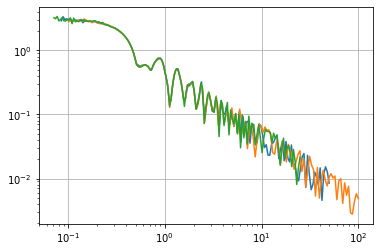

In [80]:
fig, ax = plt.subplots()

ax.plot(data100[50:,0], data100[50:,1])
ax.plot(data200[50:,0], data200[50:,1])
ax.plot(data50[50:,0], data50[50:,1])
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')

In [81]:
#data100 = np.loadtxt("c++/100.csv", delimiter=" ")
data50 = np.loadtxt("c++/50delta.csv", delimiter=" ")
#data200 = np.loadtxt("c++/200.csv", delimiter=" ")

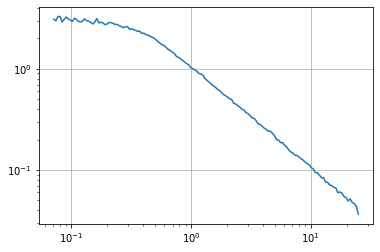

In [82]:
fig, ax = plt.subplots()

#ax.plot(data100[50:,0], data100[50:,1])
#ax.plot(data200[50:,0], data200[50:,1])
ax.plot(data50[50:,0], data50[50:,1])
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')